# Lab 11 - Logistic Regression Scratch

## Importing The Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing The Dataset

In [5]:
# ============================
# 1. LOAD DATASET
# ============================
# Download and place file as: diabetes.csv
label = 'diabetes.csv'
data = pd.read_csv('datasets/'+label)
X = data.iloc[:, :-1].values # Features
y = data.iloc[:, -1].values # Target

## Splitting The Dataset into Training Set and Test Set

In [6]:
# ============================
# 2. TRAIN-TEST SPLIT (FROM SCRATCH)

# ============================
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))
train_idx = indices[:split]
test_idx = indices[split:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

## Feature Scaling

In [7]:
# ============================
# 3. STANDARDIZATION (FROM SCRATCH)
# ============================
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


## Activation Function

In [8]:
# ============================
# 4. SIGMOID FUNCTION
# ============================
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Model Initialization

In [9]:
# ============================
# 5. MODEL INITIALIZATION
# ============================
weights = np.zeros(X_train.shape[1])
bias = 0
lr = 0.01
epochs = 1000

In [10]:
## Gradient Descent

In [11]:
# ============================
# 6. TRAINING USING GRADIENT DESCENT
# ============================

for i in range(epochs):
    z = np.dot(X_train, weights) + bias
    y_pred = sigmoid(z)
    dw = (1 / len(y_train)) * np.dot(X_train.T, (y_pred - y_train))
    db = (1 / len(y_train)) * np.sum(y_pred - y_train)
    weights = weights - lr * dw
    bias = bias - lr * db

Accuracy: 74.02597402597402 %

Confusion Matrix:
[[84 12]
 [28 30]]

Precision: 0.7142857142857143
Recall: 0.5172413793103449
F1 Score: 0.6000000000000001

AUC Score: -0.8309985632183908


C:\Users\iamsabbir\AppData\Local\Temp\ipykernel_14488\28459559.py:52: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  AUC = np.trapz(TPR, FPR)


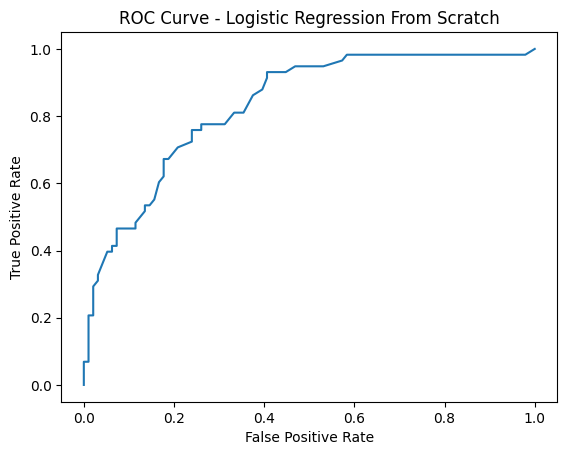

Dominant Feature: Glucose


In [12]:

# ============================
# 7. PREDICTION ON TEST DATA
# ============================
z_test = np.dot(X_test, weights) + bias
y_probs = sigmoid(z_test)
y_test_pred = (y_probs >= 0.5).astype(int)
# ============================
# 8. ACCURACY
# ============================
accuracy = np.mean(y_test_pred == y_test) * 100
print("Accuracy:", accuracy, "%")
# ============================
# 9. CONFUSION MATRIX (FROM SCRATCH)
# ============================
TP = np.sum((y_test == 1) & (y_test_pred == 1))
TN = np.sum((y_test == 0) & (y_test_pred == 0))
FP = np.sum((y_test == 0) & (y_test_pred == 1))
FN = np.sum((y_test == 1) & (y_test_pred == 0))
confusion_matrix = np.array([[TN, FP],
[FN, TP]])
print("\nConfusion Matrix:")
print(confusion_matrix)
# ============================
# 10. PRECISION, RECALL, F1-SCORE

# ============================
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
# ============================
# 11. ROC CURVE (FROM SCRATCH)
# ============================
thresholds = np.linspace(0, 1, 100)
TPR = []
FPR = []
for t in thresholds:
    y_temp = (y_probs >= t).astype(int)
    TP = np.sum((y_test == 1) & (y_temp == 1))
    TN = np.sum((y_test == 0) & (y_temp == 0))
    FP = np.sum((y_test == 0) & (y_temp == 1))
    FN = np.sum((y_test == 1) & (y_temp == 0))
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)
    TPR.append(tpr)
    FPR.append(fpr)
# ============================
# 12. AUC SCORE (FROM SCRATCH)
# ============================
AUC = np.trapz(TPR, FPR)
print("\nAUC Score:", AUC)
# ============================
# 13. PLOT ROC CURVE
# ============================

plt.figure()
plt.plot(FPR, TPR)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression From Scratch")
plt.show()
#DOMINANT FEATURE FROM WEIGHTS
feature_names = data.columns[:-1]
dominant = feature_names[np.argmax(np.abs(weights))]
print("Dominant Feature:", dominant)